## Calculating energy cost based on barcode

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [ ]:
imgtest = io.imread("tumblr_obenth3wAK1qhtovio1_1280.jpeg")

In [ ]:
plt.figure()

In [ ]:
plt.imshow(imgtest)

In [2]:
red_table = [50, 100, 250, 450]
green_table = [50, 100, 250, 450]
blue_table = [100, 200, 500, 950]

'''Calculate power usage of a color value in a pixel'''
def calculate_power_for_color(color_value, power_table):
    if color_value < 60:
       return color_value * power_table[0] / (60 - 0)
    elif color_value < 135:
       return power_table[0] + power_table[1] * (color_value - 60) / (135 - 60)
    elif color_value < 190:
       return power_table[1] + power_table[2] * (color_value - 135) / (190 - 135)
    return power_table[2] + power_table[3] * (color_value - 190) / (255 - 190)

'''Calculate power per pixel'''
def calculate_power(r, g, b):
    return (
        calculate_power_for_color(r, red_table) +
        calculate_power_for_color(g, green_table) +
        calculate_power_for_color(b, blue_table)
    )

In [40]:
calculate_power(255,255,255)

2850.0

In [3]:
def calculate_line_power(img):
    line_power = []
    for i in range(img.shape[1]):
        entry = 0
        for j in range(img.shape[0]):
            entry += calculate_power(img[j][i][0], img[j][i][1], img[j][i][2])
        line_power.append(entry)
    return line_power

In [ ]:
# TV specs: https://www.fullspecs.net/smart-tv/lg/oled55bxpua-specifications/
tv_name = "LGOLED55BXPUA"
min_power_consumption = 106
max_power_consumption = 295

# could do a search like: "max power site:www.fullspecs.net/smart-tv/"

In [ ]:
price_per_hour = 10 #10 DKK
movie_length_hours = 2

In [4]:
def calculate_cost(min_power_consumption, max_power_consumption, imgfile, movie_length_hours):
    
    # this part can be calculated offline
    img = io.imread(imgfile)
    line_power = calculate_line_power(img)
    line_power_mean = np.mean(line_power)
    
    
    # this part could be calculated online as we get info about (1) energy prices and (2) tv screen
    return (
        min_power_consumption + 
            (max_power_consumption - min_power_consumption) * line_power_mean
        / (calculate_power(255, 255, 255) * 480)
    ) * movie_length_hours / 1000 * price_per_hour

In [ ]:
calculate_cost(min_power_consumption, max_power_consumption, "tumblr_obenth3wAK1qhtovio1_1280.jpeg", movie_length_hours)


In [ ]:
calculate_cost(min_power_consumption, max_power_consumption, "tumblr_mz3dq6K2wO1qhtovio1_1280.jpeg", movie_length_hours)


In [ ]:
calculate_cost(min_power_consumption, max_power_consumption, "scarface.jpeg", movie_length_hours)

In [ ]:
calculate_cost(min_power_consumption, max_power_consumption, "images/Celebrity (1998).jpg", movie_length_hours)

In [ ]:
calculate_cost(min_power_consumption, max_power_consumption, "images/Clerks II (2006).jpg", movie_length_hours)

In [ ]:
calculate_cost(min_power_consumption, max_power_consumption, "images/The Matrix (1999)\n⇒prints.jpg", movie_length_hours)

## Creating the database of movies with energy cost per pixel

In [65]:
import pandas as pd

In [66]:
movies = pd.read_csv('movies.tsv', sep='\t', header=0)
movies

,title,runtime,rating,genre,image_path,imdb_url,soup_url
0,Star Wars: Episode VIII - The Last Jedi,9120,6.9,"Action, Adventure, Fantasy, Sci-Fi",./images/Star Wars: Episode VIII - The Last Je...,https://www.imdb.com/title/tt2527336/,https://moviebarcode.tumblr.com/page/1
1,Star Wars: Episode VIII - The Last Jedi,9120,6.9,"Action, Adventure, Fantasy, Sci-Fi",./images/Sequence from: Star Wars: Episode VII...,https://www.imdb.com/title/tt2527336/,https://moviebarcode.tumblr.com/page/1
2,And Then There Were None,5820,7.4,"Crime, Drama, Mystery, Thriller",./images/And Then There Were None (1945).jpg,http://www.imdb.com/title/tt0037515/,https://moviebarcode.tumblr.com/page/1
3,Die Ehe der Maria Braun,7200,7.7,Drama,./images/Die Ehe der Maria Braun The Marriage...,http://www.imdb.com/title/tt0079095/,https://moviebarcode.tumblr.com/page/1
4,A Perfect Day,6360,6.8,"Comedy, Drama, War",./images/A Perfect Day (2015).jpg,http://www.imdb.com/title/tt3577624/,https://moviebarcode.tumblr.com/page/1
5,Close Encounters of the Third Kind,8280,7.6,"Drama, Sci-Fi",./images/Close Encounters of the Third Kind (1...,http://www.imdb.com/title/tt0075860/,https://moviebarcode.tumblr.com/page/1
6,Les vacances de Monsieur Hulot,6840,7.3,Comedy,./images/Les vacances de Monsieur Hulot (1953)...,http://www.imdb.com/title/tt0046487/,https://moviebarcode.tumblr.com/page/1
7,Il momento della verità,6600,7.2,Drama,./images/Il momento della verità The Moment o...,http://www.imdb.com/title/tt0059459/,https://moviebarcode.tumblr.com/page/1
8,Interview with the Vampire: The Vampire Chroni...,7380,7.5,"Drama, Fantasy, Horror",./images/Interview with the Vampire (1994).jpg,http://www.imdb.com/title/tt0110148/,https://moviebarcode.tumblr.com/page/1
9,Xiao Bi de gu shi,6000,7.3,Drama,./images/Xiao Bi de gu shi Growing Up (1983).jpg,http://www.imdb.com/title/tt0085695/,https://moviebarcode.tumblr.com/page/1


In [32]:
movies = movies.drop_duplicates(subset='title', keep="first")
movies

,title,runtime,rating,genre,image_path,imdb_url,soup_url
0,Star Wars: Episode VIII - The Last Jedi,9120,6.9,"Action, Adventure, Fantasy, Sci-Fi",./images/Star Wars: Episode VIII - The Last Je...,https://www.imdb.com/title/tt2527336/,https://moviebarcode.tumblr.com/page/1
2,And Then There Were None,5820,7.4,"Crime, Drama, Mystery, Thriller",./images/And Then There Were None (1945).jpg,http://www.imdb.com/title/tt0037515/,https://moviebarcode.tumblr.com/page/1
3,Die Ehe der Maria Braun,7200,7.7,Drama,./images/Die Ehe der Maria Braun The Marriage...,http://www.imdb.com/title/tt0079095/,https://moviebarcode.tumblr.com/page/1
4,A Perfect Day,6360,6.8,"Comedy, Drama, War",./images/A Perfect Day (2015).jpg,http://www.imdb.com/title/tt3577624/,https://moviebarcode.tumblr.com/page/1
5,Close Encounters of the Third Kind,8280,7.6,"Drama, Sci-Fi",./images/Close Encounters of the Third Kind (1...,http://www.imdb.com/title/tt0075860/,https://moviebarcode.tumblr.com/page/1
6,Les vacances de Monsieur Hulot,6840,7.3,Comedy,./images/Les vacances de Monsieur Hulot (1953)...,http://www.imdb.com/title/tt0046487/,https://moviebarcode.tumblr.com/page/1
7,Il momento della verità,6600,7.2,Drama,./images/Il momento della verità The Moment o...,http://www.imdb.com/title/tt0059459/,https://moviebarcode.tumblr.com/page/1
8,Interview with the Vampire: The Vampire Chroni...,7380,7.5,"Drama, Fantasy, Horror",./images/Interview with the Vampire (1994).jpg,http://www.imdb.com/title/tt0110148/,https://moviebarcode.tumblr.com/page/1
9,Xiao Bi de gu shi,6000,7.3,Drama,./images/Xiao Bi de gu shi Growing Up (1983).jpg,http://www.imdb.com/title/tt0085695/,https://moviebarcode.tumblr.com/page/1
10,Journey to the Seventh Planet,4620,4.7,"Action, Adventure, Fantasy, Horror, Sci-Fi",./images/Journey to the Seventh Planet (1962).jpg,http://www.imdb.com/title/tt0056127/,https://moviebarcode.tumblr.com/page/2


In [33]:
movies['runtime_hours'] = movies['runtime']/3600
movies['runtime_hours']

/var/folders/c3/y1jl2pxx1011s3xbcm4ls1400000gn/T/ipykernel_99628/1148562127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['runtime_hours'] = movies['runtime']/3600


0     2.533333
2     1.616667
3     2.000000
4     1.766667
5     2.300000
6     1.900000
7     1.833333
8     2.050000
9     1.666667
10    1.283333
11    2.166667
12    1.583333
13    2.166667
14    1.333333
15    2.133333
16    1.500000
17    1.666667
18    3.133333
19    2.450000
20    1.600000
21    1.633333
22    1.750000
23    1.866667
24    1.766667
Name: runtime_hours, dtype: float64

In [35]:
line_powers = []

for i in range(0,len(movies)):
    print(movies.iloc[i].image_path)
    img = io.imread(movies.iloc[i].image_path)
    line_power = calculate_line_power(img)
    line_power_mean = np.mean(line_power)
    line_powers.append(line_power_mean)

./images/Star Wars: Episode VIII - The Last Jedi (2017).jpg
./images/And Then There Were None (1945).jpg
./images/Die Ehe der Maria Braun  The Marriage of Maria Braun (1979).jpg
./images/A Perfect Day (2015).jpg
./images/Close Encounters of the Third Kind (1977).jpg
./images/Les vacances de Monsieur Hulot (1953).jpg
./images/Il momento della verità  The Moment of Truth (1965).jpg
./images/Interview with the Vampire (1994).jpg
./images/Xiao Bi de gu shi  Growing Up (1983).jpg
./images/Journey to the Seventh Planet (1962).jpg
./images/The Big Short (2015).jpg
./images/Green Room (2015).jpg
./images/I compagni  The Organizer (1963).jpg
./images/O Menino e o Mundo  Boy and the World (2013).jpg
./images/Dracula (1992).jpg
./images/Anomalisa (2015).jpg
./images/Send Me No Flowers (1964).jpg
./images/Fanny och Alexander (1982).jpg
./images/Bound for Glory (1976).jpg
./images/Resurrected (1989).jpg
./images/Short Circuit (1986).jpg
./images/Below (2002).jpg
./images/Que Horas Ela Volta?  The S

In [36]:
movies['pixels_cost'] = line_powers
movies

/var/folders/c3/y1jl2pxx1011s3xbcm4ls1400000gn/T/ipykernel_99628/1474699692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['pixels_cost'] = line_powers


,title,runtime,rating,genre,image_path,imdb_url,soup_url,runtime_hours,pixels_cost
0,Star Wars: Episode VIII - The Last Jedi,9120,6.9,"Action, Adventure, Fantasy, Sci-Fi",./images/Star Wars: Episode VIII - The Last Je...,https://www.imdb.com/title/tt2527336/,https://moviebarcode.tumblr.com/page/1,2.533333,92518.447508
2,And Then There Were None,5820,7.4,"Crime, Drama, Mystery, Thriller",./images/And Then There Were None (1945).jpg,http://www.imdb.com/title/tt0037515/,https://moviebarcode.tumblr.com/page/1,1.616667,86477.686402
3,Die Ehe der Maria Braun,7200,7.7,Drama,./images/Die Ehe der Maria Braun The Marriage...,http://www.imdb.com/title/tt0079095/,https://moviebarcode.tumblr.com/page/1,2.000000,88595.179142
4,A Perfect Day,6360,6.8,"Comedy, Drama, War",./images/A Perfect Day (2015).jpg,http://www.imdb.com/title/tt3577624/,https://moviebarcode.tumblr.com/page/1,1.766667,238280.291336
5,Close Encounters of the Third Kind,8280,7.6,"Drama, Sci-Fi",./images/Close Encounters of the Third Kind (1...,http://www.imdb.com/title/tt0075860/,https://moviebarcode.tumblr.com/page/1,2.300000,133868.685903
6,Les vacances de Monsieur Hulot,6840,7.3,Comedy,./images/Les vacances de Monsieur Hulot (1953)...,http://www.imdb.com/title/tt0046487/,https://moviebarcode.tumblr.com/page/1,1.900000,218454.860675
7,Il momento della verità,6600,7.2,Drama,./images/Il momento della verità The Moment o...,http://www.imdb.com/title/tt0059459/,https://moviebarcode.tumblr.com/page/1,1.833333,135906.585246
8,Interview with the Vampire: The Vampire Chroni...,7380,7.5,"Drama, Fantasy, Horror",./images/Interview with the Vampire (1994).jpg,http://www.imdb.com/title/tt0110148/,https://moviebarcode.tumblr.com/page/1,2.050000,39670.490076
9,Xiao Bi de gu shi,6000,7.3,Drama,./images/Xiao Bi de gu shi Growing Up (1983).jpg,http://www.imdb.com/title/tt0085695/,https://moviebarcode.tumblr.com/page/1,1.666667,122703.739521
10,Journey to the Seventh Planet,4620,4.7,"Action, Adventure, Fantasy, Horror, Sci-Fi",./images/Journey to the Seventh Planet (1962).jpg,http://www.imdb.com/title/tt0056127/,https://moviebarcode.tumblr.com/page/2,1.283333,100944.020906


In [ ]:
"""
# do this here just for testing, otherwise to be done in extension

def calculate_movie_cost(min_power_consumption, max_power_consumption, pixels_cost, movie_length_hours, price_per_hour):
    return (
        min_power_consumption + 
            (max_power_consumption - min_power_consumption) * pixels_cost
        / (calculate_power(255, 255, 255) * 480)
    ) * movie_length_hours / 1000 * price_per_hour

movies_cost = []

for i in range(0,len(movies)):
    movies_cost.append(calculate_movie_cost(min_power_consumption=106, 
                         max_power_consumption=295, 
                         pixels_cost=movies.iloc[i].pixels_cost, 
                         movie_length_hours=movies.iloc[i].runtime_hours,
                         price_per_hour=10))
    
movies['movie_cost'] = movies_cost
movies
"""

In [37]:
movies = movies.set_index(movies.columns[0])
movies

,runtime,rating,genre,image_path,imdb_url,soup_url,runtime_hours,pixels_cost
title,,,,,,,,
Star Wars: Episode VIII - The Last Jedi,9120,6.9,"Action, Adventure, Fantasy, Sci-Fi",./images/Star Wars: Episode VIII - The Last Je...,https://www.imdb.com/title/tt2527336/,https://moviebarcode.tumblr.com/page/1,2.533333,92518.447508
And Then There Were None,5820,7.4,"Crime, Drama, Mystery, Thriller",./images/And Then There Were None (1945).jpg,http://www.imdb.com/title/tt0037515/,https://moviebarcode.tumblr.com/page/1,1.616667,86477.686402
Die Ehe der Maria Braun,7200,7.7,Drama,./images/Die Ehe der Maria Braun The Marriage...,http://www.imdb.com/title/tt0079095/,https://moviebarcode.tumblr.com/page/1,2.000000,88595.179142
A Perfect Day,6360,6.8,"Comedy, Drama, War",./images/A Perfect Day (2015).jpg,http://www.imdb.com/title/tt3577624/,https://moviebarcode.tumblr.com/page/1,1.766667,238280.291336
Close Encounters of the Third Kind,8280,7.6,"Drama, Sci-Fi",./images/Close Encounters of the Third Kind (1...,http://www.imdb.com/title/tt0075860/,https://moviebarcode.tumblr.com/page/1,2.300000,133868.685903
Les vacances de Monsieur Hulot,6840,7.3,Comedy,./images/Les vacances de Monsieur Hulot (1953)...,http://www.imdb.com/title/tt0046487/,https://moviebarcode.tumblr.com/page/1,1.900000,218454.860675
Il momento della verità,6600,7.2,Drama,./images/Il momento della verità The Moment o...,http://www.imdb.com/title/tt0059459/,https://moviebarcode.tumblr.com/page/1,1.833333,135906.585246
Interview with the Vampire: The Vampire Chronicles,7380,7.5,"Drama, Fantasy, Horror",./images/Interview with the Vampire (1994).jpg,http://www.imdb.com/title/tt0110148/,https://moviebarcode.tumblr.com/page/1,2.050000,39670.490076
Xiao Bi de gu shi,6000,7.3,Drama,./images/Xiao Bi de gu shi Growing Up (1983).jpg,http://www.imdb.com/title/tt0085695/,https://moviebarcode.tumblr.com/page/1,1.666667,122703.739521


In [42]:
movies = movies.drop(columns=['image_path', 'soup_url'])
movies

,runtime,rating,genre,imdb_url,runtime_hours,pixels_cost
title,,,,,,
Star Wars: Episode VIII - The Last Jedi,9120,6.9,"Action, Adventure, Fantasy, Sci-Fi",https://www.imdb.com/title/tt2527336/,2.533333,92518.447508
And Then There Were None,5820,7.4,"Crime, Drama, Mystery, Thriller",http://www.imdb.com/title/tt0037515/,1.616667,86477.686402
Die Ehe der Maria Braun,7200,7.7,Drama,http://www.imdb.com/title/tt0079095/,2.000000,88595.179142
A Perfect Day,6360,6.8,"Comedy, Drama, War",http://www.imdb.com/title/tt3577624/,1.766667,238280.291336
Close Encounters of the Third Kind,8280,7.6,"Drama, Sci-Fi",http://www.imdb.com/title/tt0075860/,2.300000,133868.685903
Les vacances de Monsieur Hulot,6840,7.3,Comedy,http://www.imdb.com/title/tt0046487/,1.900000,218454.860675
Il momento della verità,6600,7.2,Drama,http://www.imdb.com/title/tt0059459/,1.833333,135906.585246
Interview with the Vampire: The Vampire Chronicles,7380,7.5,"Drama, Fantasy, Horror",http://www.imdb.com/title/tt0110148/,2.050000,39670.490076
Xiao Bi de gu shi,6000,7.3,Drama,http://www.imdb.com/title/tt0085695/,1.666667,122703.739521


In [43]:
with open('movies.json', 'w') as f:
    f.write(movies.to_json(orient="index"))

In [45]:
movies.sort_values(by=['pixels_cost'])

,runtime,rating,genre,imdb_url,runtime_hours,pixels_cost
title,,,,,,
Green Room,5700,7.0,"Crime, Drama, Horror, Music, Thriller",http://www.imdb.com/title/tt4062536/,1.583333,37608.785297
Interview with the Vampire: The Vampire Chronicles,7380,7.5,"Drama, Fantasy, Horror",http://www.imdb.com/title/tt0110148/,2.050000,39670.490076
Dracula,7680,7.4,"Drama, Fantasy, Horror, Romance",http://www.imdb.com/title/tt0103874/,2.133333,55319.001370
Below,6300,6.1,"Action, Horror, Mystery, Thriller",http://www.imdb.com/title/tt0276816/,1.750000,72921.556545
Anomalisa,5400,7.2,"Animation, Comedy, Drama, Romance",http://www.imdb.com/title/tt2401878/,1.500000,85044.404150
And Then There Were None,5820,7.4,"Crime, Drama, Mystery, Thriller",http://www.imdb.com/title/tt0037515/,1.616667,86477.686402
Die Ehe der Maria Braun,7200,7.7,Drama,http://www.imdb.com/title/tt0079095/,2.000000,88595.179142
Star Wars: Episode VIII - The Last Jedi,9120,6.9,"Action, Adventure, Fantasy, Sci-Fi",https://www.imdb.com/title/tt2527336/,2.533333,92518.447508
Bound for Glory,8820,7.3,"Biography, Drama, Music",http://www.imdb.com/title/tt0074235/,2.450000,97392.760466


In [46]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Pixels Cost')

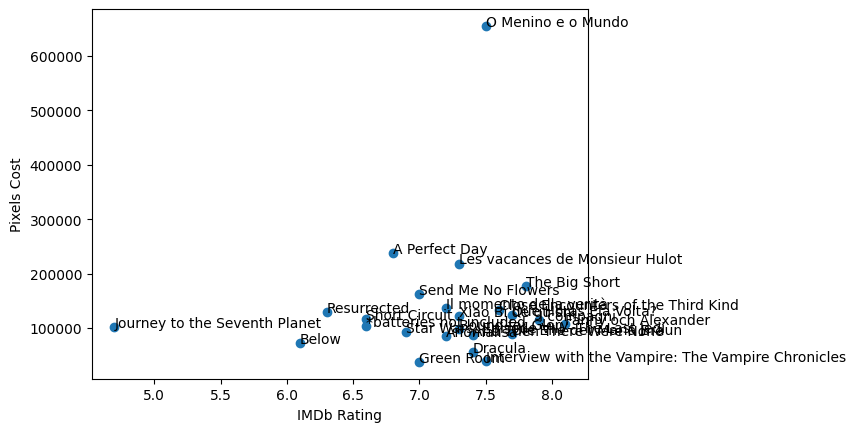

In [64]:
fig, ax = plt.subplots()
ax.scatter(movies['rating'], movies['pixels_cost'])
for i, txt in enumerate(movies.index):
    ax.annotate(txt, (movies['rating'][i], movies['pixels_cost'][i]))
ax.set_xlabel("IMDb Rating")
ax.set_ylabel("Pixels Cost")